In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#Download stopwords from nltk library
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from nltk.corpus import stopwords
STOPWORDS = stopwords.words('english')

In [4]:
#Mount Google Drive to this Colab notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Define column names for the data
col = ["title", "text", "subject", "date"]
# Read fake news and real news data from the specified CSV files into DataFrames.
fake_data = pd.read_csv('/content/drive/MyDrive/Fake.csv', header=None, names=col, skiprows=1)
real_data = pd.read_csv('/content/drive/MyDrive/True.csv', header=None, names=col, skiprows=1)

In [6]:
fake_data.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [7]:
fake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [8]:
real_data.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [9]:
real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [10]:
# Assigning a category label of 1 to indicate real news in the real_data DataFrame
real_data['category'] = 1
# Assigning a category label of 0 to indicate fake news in the fake_data DataFrame
fake_data['category'] = 0

In [11]:
#concatenate fake and real dataframes into single dataframe
df = pd.DataFrame(pd.concat([fake_data,real_data]))

In [12]:
df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  category  
0  December 31, 2017         0  
1  December 31, 2017         0  
2  December 30, 2017         0  
3  December 29, 2017         0  
4  December 25, 2017         0

In [13]:
#Check for null values
df.isnull().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

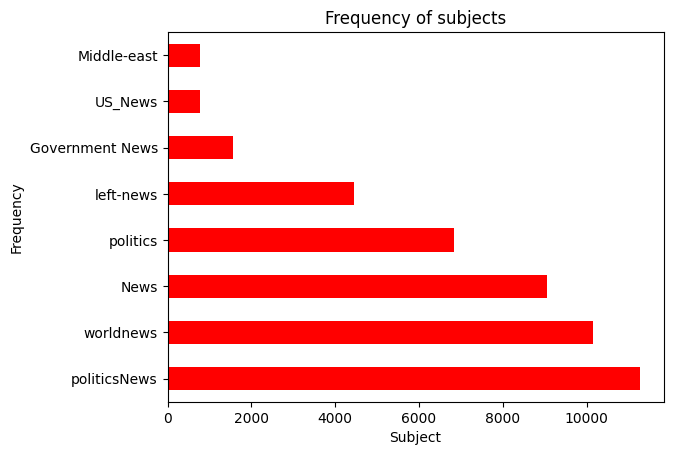

In [14]:
#create visualization for the frequency of subjects present in the data
from matplotlib import pyplot as plt
df['subject'].value_counts().plot(kind='barh', color='red')
plt.xlabel('Subject')
plt.ylabel('Frequency')
plt.title('Frequency of subjects')
plt.show()

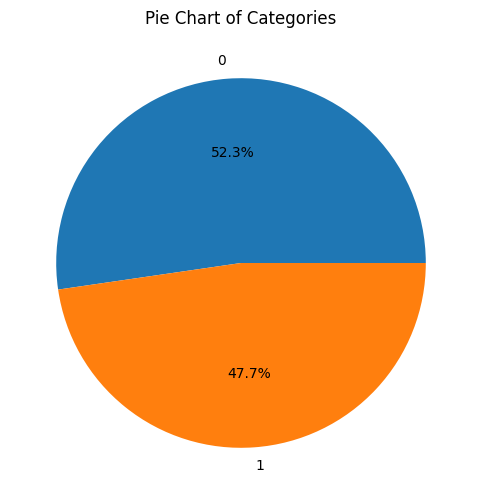

In [15]:
#create visualization for the percentage of real and fake news
plt.figure(figsize=(8, 6))
df['category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Categories')
plt.ylabel('')
plt.show()

In [16]:
df['date'].isnull().sum()

0

In [17]:
df['date'].dtype

dtype('O')

<Figure size 1500x600 with 0 Axes>

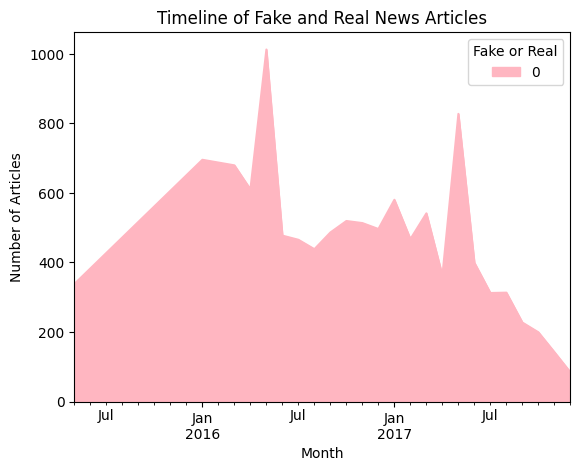

In [18]:
#Create visalization for the timeline of fake and real news articles
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'],errors='coerce')

timeline_data = df.groupby([df['date'].dt.to_period('M'), 'category']).size().unstack().fillna(0)

# Creating a line plot
plt.figure(figsize=(15, 6))
timeline_data.plot(kind='area',stacked=True, color=['lightpink','lightblue'])
plt.title('Timeline of Fake and Real News Articles')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.legend(title='Fake or Real')
plt.show()

In [19]:
df['color'] = df['category'].map({0: 'salmon ', 1: 'lightblue'})

In [20]:
import plotly.express as px


df['text_length'] = df['text'].apply(lambda x: len(x))

fig_histogram = px.histogram(df, x='text_length', color='category',
                             color_discrete_map={0: 'lightsalmon', 1: 'lightblue'},
                             marginal='box', # Displays a box plot for additional insight
                             title='Distribution of Article Lengths by Category')
fig_histogram.show()

**Text** **preprocessing**


In [21]:
import re
from wordcloud import WordCloud, STOPWORDS

fake = " ".join(article for article in fake_data["text"])
real = " ".join(article for article in real_data["text"])

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove digits
    return text

fake_cleaned = preprocess_text(fake)
real_cleaned= preprocess_text(real)

fake_cleaned[:300]

'donald trump just couldn t wish all americans a happy new year and leave it at that instead he had to give a shout out to his enemies haters and  the very dishonest fake news media  the former reality show star had just one job to do and he couldn t do it as our country rapidly grows stronger and sm'

In [22]:
print(STOPWORDS)

{"wasn't", 'himself', "can't", "we'd", 'should', 'not', 'their', 'yours', 'if', 'themselves', "she's", 'your', 'very', 'of', 'few', 'i', 'against', 'else', "i'll", 'him', 'myself', "isn't", 'same', 'then', 'while', "there's", "we've", "it's", 'were', 'further', 'is', "where's", 'r', "why's", 'with', "he's", 'out', 'she', 'at', 'but', "here's", 'shall', 'a', 'under', "you'd", "they've", 'me', 'being', 'therefore', 'between', 'it', 'such', 'her', "we'll", 'them', 'get', 'whom', 'that', "don't", "haven't", "mustn't", 'ourselves', 'would', "who's", 'do', 'some', 'ours', "they'd", "wouldn't", 'like', 'hence', "shan't", "he'll", 'they', 'because', 'in', 'other', 'who', 'our', 'each', 'on', 'however', 'com', 'above', 'here', 'when', 'after', "what's", 'until', 'there', 'any', 'for', 'did', "doesn't", 'below', 'he', "we're", 'once', "let's", 'again', 'cannot', "hasn't", "when's", 'most', 'my', "shouldn't", "aren't", 'only', 'having', 'why', "hadn't", 'to', 'you', 'all', 'during', 'over', 'just

In [23]:
import plotly.graph_objects as go

wordcloud_fake = WordCloud(stopwords=STOPWORDS, background_color="white", max_words=500, width=800, height=400).generate(fake_cleaned)

fig = go.Figure(go.Image(z=wordcloud_fake))
fig.update_layout(title_text='Word Cloud for Fake News Articles', title_x=0.5)
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.show()

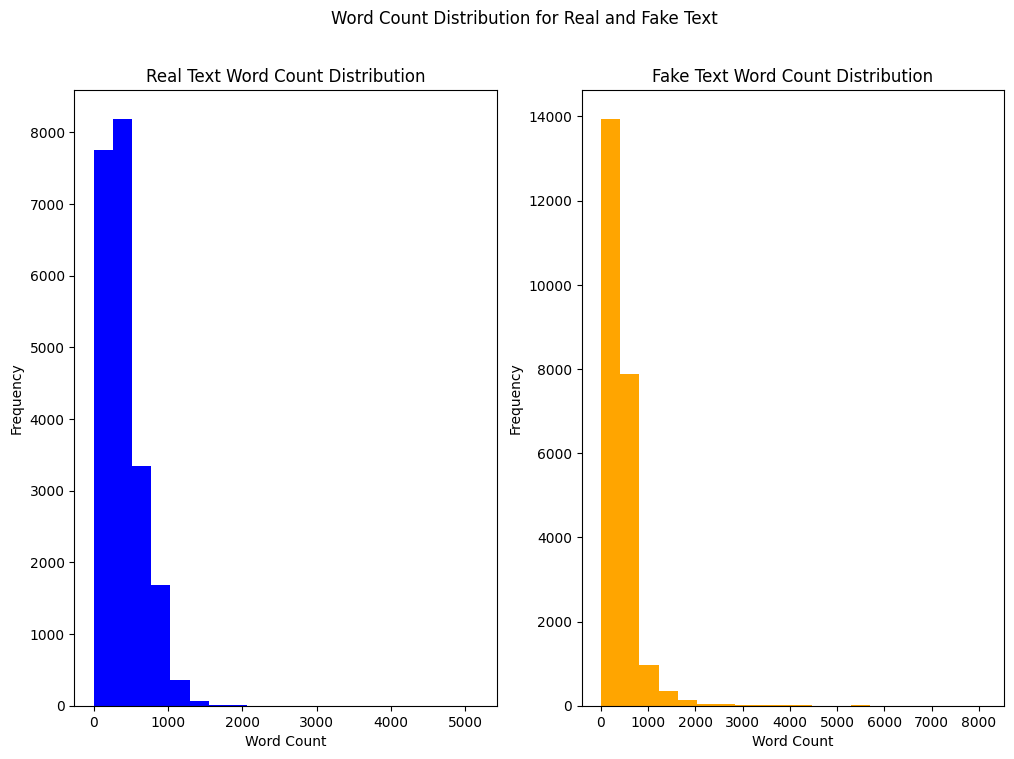

In [24]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

# Plotting word count distribution for real text
real_word_count = df[df['category'] == 1]['text'].str.split().apply(len)
ax1.hist(real_word_count, color='blue', bins=20)
ax1.set_title('Real Text Word Count Distribution')

# Plotting word count distribution for fake text
fake_word_count = df[df['category'] == 0]['text'].str.split().apply(len)
ax2.hist(fake_word_count, color='orange', bins=20)
ax2.set_title('Fake Text Word Count Distribution')

# Adding labels and titles
ax1.set_xlabel('Word Count')
ax1.set_ylabel('Frequency')
ax2.set_xlabel('Word Count')
ax2.set_ylabel('Frequency')
fig.suptitle('Word Count Distribution for Real and Fake Text')

# Show the plot
plt.show()

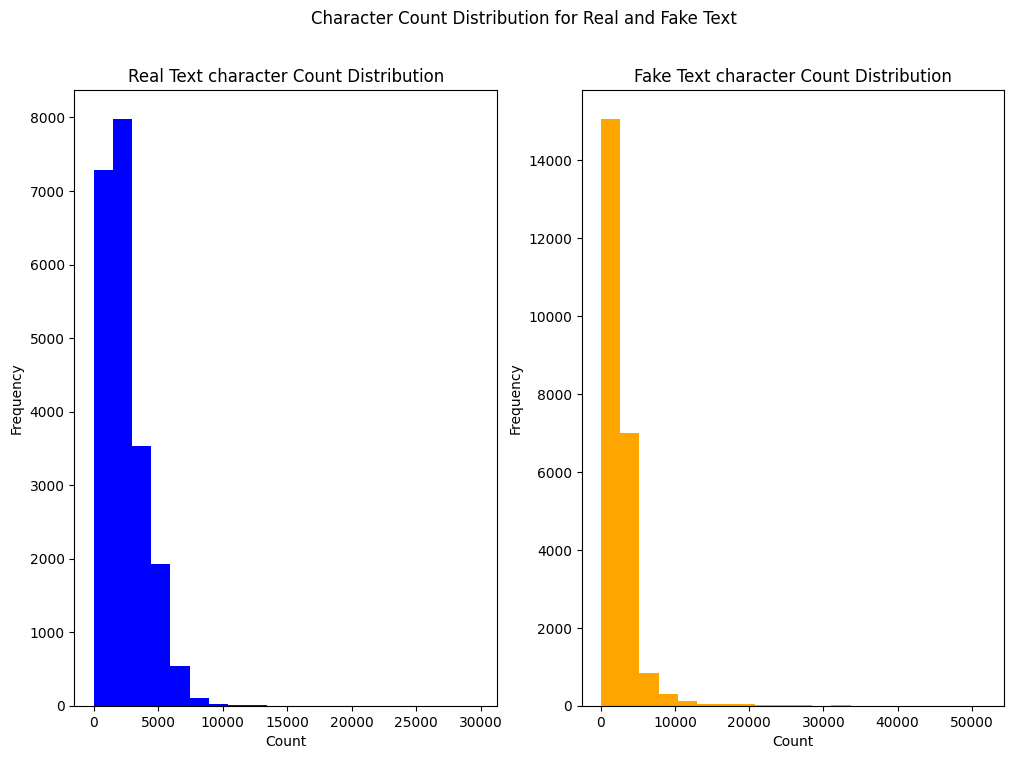

In [25]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

# Plotting word count distribution for real text
real_char_count = df[df['category'] == 1]['text'].str.len()
ax1.hist(real_char_count, color='blue', bins=20)
ax1.set_title('Real Text character Count Distribution')

# Plotting word count distribution for fake text
fake_word_count = df[df['category'] == 0]['text'].str.len()
ax2.hist(fake_word_count, color='orange', bins=20)
ax2.set_title('Fake Text character Count Distribution')

# Adding labels and titles
ax1.set_xlabel('Count')
ax1.set_ylabel('Frequency')
ax2.set_xlabel('Count')
ax2.set_ylabel('Frequency')
fig.suptitle('Character Count Distribution for Real and Fake Text')

# Show the plot
plt.show()

<ipython-input-26-4c9b01c0b339>:21: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-26-4c9b01c0b339>:22: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




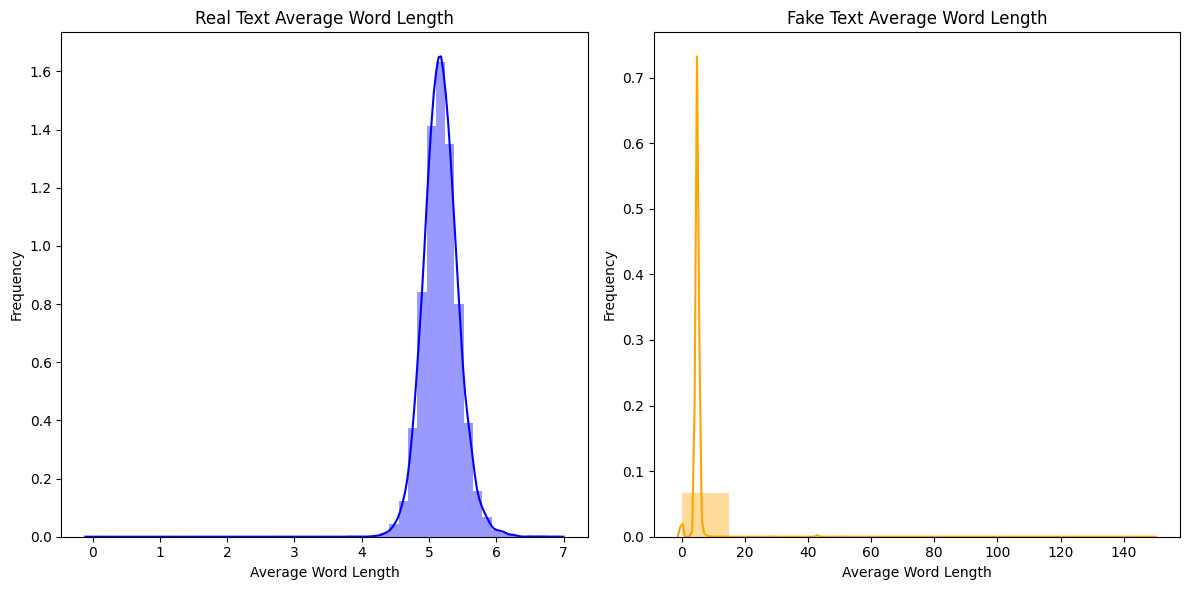

In [26]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate average word length
def calculate_avg_word_length(text):
    word_lengths = [len(word) for word in text.split()]
    if len(word_lengths) == 0:
        return 0  # Return 0 if there are no words in the text
    else:
        return sum(word_lengths) / len(word_lengths)

# Calculate average word length for real and fake text
real_avg_word_length = df[df['category'] == 1]['text'].apply(calculate_avg_word_length)
fake_avg_word_length = df[df['category'] == 0]['text'].apply(calculate_avg_word_length)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot histograms using distplot
sns.distplot(real_avg_word_length, ax=ax1, color='blue')
sns.distplot(fake_avg_word_length, ax=ax2, color='orange', bins=10)

# Add titles and labels
ax1.set_title('Real Text Average Word Length')
ax1.set_xlabel('Average Word Length')
ax1.set_ylabel('Frequency')
ax2.set_title('Fake Text Average Word Length')
ax2.set_xlabel('Average Word Length')
ax2.set_ylabel('Frequency')

# Add space between subplots
plt.tight_layout()

# Show plot
plt.show()

**N GRAM ANALYSIS**

In [27]:
from nltk.util import ngrams
from collections import Counter

def get_ngrams(corpus, ngram_range, top_n):
    # Tokenize the corpus
    tokenized_corpus = [word for sentence in corpus for word in sentence.split()]
    # Generate n-grams
    n_grams = ngrams(tokenized_corpus, ngram_range)
    # Count the frequency of each n-gram
    ngram_freq = Counter(n_grams)

    # Get top n-grams
    top_ngrams = ngram_freq.most_common(top_n)

    return top_ngrams

# Get top 5 bi-grams from fake news titles
fake_news_bigrams = get_ngrams(fake_data['title'],2, 5)

# Get top 5 bi-grams from true news titles
true_news_bigrams = get_ngrams(real_data['title'],2, 5)

# Create DataFrame
bigrams_df = pd.DataFrame({
    'Fake News Bi-Grams': [f"{bigram[0]} ({bigram[1]})" for bigram in fake_news_bigrams],
    'True News Bi-Grams': [f"{bigram[0]} ({bigram[1]})" for bigram in true_news_bigrams]
})

bigrams_df

Fake News Bi-Grams          True News Bi-Grams
0     ('Donald', 'Trump') (547)    ('White', 'House') (734)
1      ('White', 'House') (268)    ('North', 'Korea') (578)
2         ('Trump', 'Is') (247)     ('Trump', 'says') (351)
3  ('President', 'Trump') (245)       ('Trump', 'to') (309)
4           ('In', 'The') (241)  ('Supreme', 'Court') (222)

**Fake News Bi-Grams:**

The most frequent bi-gram in fake news titles is 'Donald Trump', which occurs 547 times.
The second most frequent bi-gram is 'White House' with a frequency of 268.

**True News Bi-Grams**

The most frequent bi-gram in true news titles is 'White House', which occurs 734 times.
The second most frequent bi-gram is 'North Korea' with a frequency of 578.


The prominence of 'Donald Trump' in fake news titles might suggest a focus on sensationalism or political bias.
The occurrence of 'White House' and 'North Korea' in true news titles might indicate coverage of political events or international relations.

In [28]:
fake_news_trigrams = get_ngrams(fake_data['title'], 3, 5)
true_news_trigrams = get_ngrams(real_data['title'], 3, 5)

trigrams_df = pd.DataFrame({
    'Fake News Tri-Grams': [f"{trigram[0]} ({trigram[1]})" for trigram in fake_news_trigrams],
    'True News Tri-Grams': [f"{trigram[0]} ({trigram[1]})" for trigram in true_news_trigrams]
})

trigrams_df

Fake News Tri-Grams               True News Tri-Grams
0     ('Boiler', 'Room', 'EP') (104)    ('on', 'North', 'Korea') (108)
1  ('Black', 'Lives', 'Matter') (78)  ('Trump', 'on', 'Twitter') (100)
2     ('The', 'White', 'House') (63)   ('White', 'House', 'says') (86)
3         ('To', 'Vote', 'For') (42)      ('Trump', 'says', 'he') (83)
4         ('In', 'Front', 'Of') (41)  ('Factbox:', 'Trump', 'on') (72)

1.The presence of phrases like 'Boiler Room EP' and 'Black Lives Matter' in fake news tri-grams suggests a tendency towards sensationalism or subjective interpretation of events.

2.In contrast, true news tri-grams containing phrases like 'White House says' and 'Trump says he' indicate more objective reporting, focusing on statements made by credible sources.

3.Fake news tri-grams might include phrases that are misleading or designed to deceive, such as 'To Vote For'.

4.True news tri-grams often include phrases that provide context or factual information, such as 'Factbox: Trump on'.

In [29]:
df

title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
0      Donald Trump just couldn t wish all Americans ...       News   
1      House Intelligence Committee Chairman Devin Nu...       News   
2      On Friday, it was revealed that former Milwauk...       News   
3      On Christmas day, Donald Trump announced that ...       News   
4      Pope Francis used his annual Christmas Day mes...       News   
...                                                  ...        ...   
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...  worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...  worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...  worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...  worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...  worldnews   

            date  category      color  text_length  
0     2017-12-31         0    salmon          2893  
1     2017-12-31         0    salmon          1898  
2     2017-12-30         0    salmon          3597  
3     2017-12-29         0    salmon          2774  
4     2017-12-25         0    salmon          2346  
...          ...       ...        ...          ...  
21412        NaT         1  lightblue         2821  
21413        NaT         1  lightblue          800  
21414        NaT         1  lightblue         1950  
21415        NaT         1  lightblue         1199  
21416        NaT         1  lightblue         1338  

[44898 rows x 7 columns]

In [30]:
#Preprocess text by converting it to lower case, tokenizing, removing stop words and stemming(converting words to base or root form)
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
def text_preprocess(text):

    text = text.lower() #convert to lowercase

    tokens = word_tokenize(text) # Tokenize

    tokens = [token for token in tokens if token.isalpha() and token not in stopwords.words('english')] #Remove stopwords and non-alphabetic tokens

    stemmer = PorterStemmer() #Stemming
    tokens = [stemmer.stem(token) for token in tokens]

    return " ".join(tokens)

In [36]:
#create a parallel execution environment using joblib to carry out text preprocess on whole dataframe
from joblib import Parallel, delayed
from multiprocessing import cpu_count

def chunk_preprocess(chunk):
    return chunk.apply(text_preprocess)

def parallel_preprocessing(input, func=chunk_preprocess, n_jobs=-1):
    """
    Parallelize any function that processes a DataFrame.
    """
    if n_jobs == -1:
        # Utilize all available cpu cores
        n_jobs = cpu_count()

    # Divide the data into segments, with each segment corresponding to a CPU core.
    chunks = np.array_split(input, n_jobs)

    # Use joblib to parallelize the function
    with Parallel(n_jobs= n_jobs, backend='multiprocessing') as parallel:
        parallel_data = parallel(delayed(func)(chunk) for chunk in chunks)

    # Combine the processed segments into a single DataFrame.
    return pd.concat(parallel_data)

In [37]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import joblib

def train_word2vec_model(sentences, vector_size=100, window=5, min_count=1, workers=4):
    """
    Train a Word2Vec model on the provided sentences and save it.
    """
    model = Word2Vec(sentences=sentences, vector_size=vector_size, window=window, min_count=min_count, workers=workers)
    drive.mount('/content/drive')
    model_path = '/content/drive/My Drive/w2v_model.pkl'
    joblib.dump(model, 'w2v_model.pkl')
    model.save('w2v_model_gensim.bin')
    return model

def get_sentence_avg_vector(sentence, model):
    """
    Get the average word vector representation of a sentence using the provided Word2Vec model.
    """
    words = word_tokenize(sentence)
    vectors = [model.wv[i] for i in words if i in model.wv.key_to_index]

    if vectors:
        average_vector = sum(vectors) / len(vectors)
    else:
        average_vector = [0] * model.vector_size
    return average_vector

In [38]:
#import punkt tokenizer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
from sklearn.model_selection import train_test_split
def split_data(df, test_size=0.2, val_size=0.1):
    #Split the merged dataframe into train, test, and validation sets
    train_val, test = train_test_split(df, test_size=test_size, random_state=42, stratify=df['category'])

    train, val = train_test_split(train_val, test_size=val_size, random_state=42, stratify=train_val['category'])

    return train, val, test
train_data, val_data, test_data = split_data(df)

train_data.size



226282

In [40]:
train_data['text'] = parallel_preprocessing(train_data['text'])
val_data['text'] = parallel_preprocessing(val_data['text'])
test_data['text'] = parallel_preprocessing(test_data['text'])

In [41]:
# Word2Vec embeddings
sentences = train_data['text'].apply(word_tokenize).tolist()
w2v_embeddings = train_word2vec_model(sentences)
train_data['w2v'] = train_data['text'].apply(lambda x: get_sentence_avg_vector(x, w2v_embeddings))
val_data['w2v'] = val_data['text'].apply(lambda x: get_sentence_avg_vector(x, w2v_embeddings))
test_data['w2v'] = test_data['text'].apply(lambda x: get_sentence_avg_vector(x, w2v_embeddings))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
train_data.head()


title  \
6408    Bill O’Reilly Pathetically Defends Trump: ‘Je...   
6934    This Important Video Sums Up Why Donald Trump...   
14746  German spy chief sees Russia as danger, cites ...   
21112  U.S. intel official: No doubt North Korea test...   
18968  British police release three more men in Londo...   

                                                    text    subject  \
6408   fox news host bill reilli fox busi host lou do...       News   
6934   despit damag presid georg bush war monger admi...       News   
14746  berlin reuter germani spi chief warn russia se...  worldnews   
21112  washington reuter intellig offici said sunday ...  worldnews   
18968  reuter british polic said tuesday releas three...  worldnews   

            date  category      color  text_length  \
6408  2016-05-12         0    salmon          2454   
6934  2016-04-13         0    salmon          1600   
14746        NaT         1  lightblue         2098   
21112        NaT         1  lightblue          556   
18968        NaT         1  lightblue         1267   

                                                     w2v  
6408   [-0.20519945, -0.043624625, -0.012426881, 0.12...  
6934   [-0.10974734, 0.12541936, 0.21506491, 0.299149...  
14746  [-0.106959, 0.5170367, 0.1821177, -0.20159829,...  
21112  [-0.20821609, 0.26223043, 0.46329582, -0.37005...  
18968  [-0.058472387, 0.55537426, -0.08575572, -0.249...

In [43]:
xtrain_w2v = np.stack(train_data['w2v'].to_numpy())
xtest_w2v = np.stack(test_data['w2v'].to_numpy())

ytrain = train_data['category']
ytest = test_data['category']

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix

In [45]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=100),
    "Linear SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



                                F1 Score            Confusion Matrix  \
Logistic Regression (Word2Vec)  0.965645  [[4524, 172], [124, 4160]]   
Linear SVM (Word2Vec)           0.965781  [[4522, 174], [121, 4163]]   
Random Forest (Word2Vec)        0.960131  [[4533, 163], [178, 4106]]   
Decision Tree (Word2Vec)        0.919014  [[4375, 321], [369, 3915]]   
Gradient Boosting (Word2Vec)    0.948673  [[4443, 253], [190, 4094]]   

                                                             FPR  \
Logistic Regression (Word2Vec)  [0.0, 0.036626916524701875, 1.0]   
Linear SVM (Word2Vec)            [0.0, 0.03705281090289608, 1.0]   
Random Forest (Word2Vec)         [0.0, 0.03471039182282794, 1.0]   
Decision Tree (Word2Vec)         [0.0, 0.06835604770017036, 1.0]   
Gradient Boosting (Word2Vec)     [0.0, 0.05387563884156729, 1.0]   

                                                           TPR       AUC  
Logistic Regression (Word2Vec)  [0.0, 0.9710550887021475, 1.0]  0.967214  
Linear S

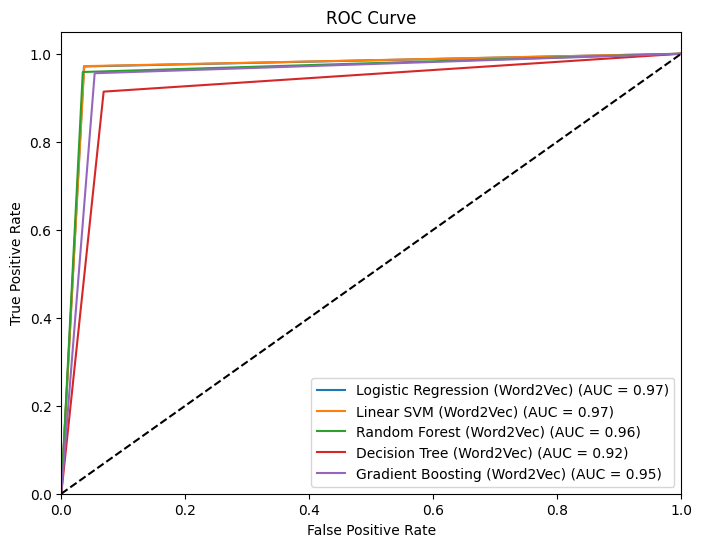

In [46]:
from sklearn.metrics import roc_curve, auc
res = {}

# Iterate over classifiers
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(xtrain_w2v, ytrain)

    # Make predictions
    predictions_w2v = clf.predict(xtest_w2v)

    # Calculate F1 score
    f1 = f1_score(ytest, predictions_w2v)

    # Calculate confusion matrix
    cm = confusion_matrix(ytest, predictions_w2v)

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(ytest, predictions_w2v)
    roc_auc = auc(fpr, tpr)

    # Store results in the dictionary
    res[name + " (Word2Vec)"] = {
        "F1 Score": f1,
        "Confusion Matrix": cm,
        "FPR": fpr,
        "TPR": tpr,
        "AUC": roc_auc
    }

# Convert results to a pandas DataFrame for better visualization
res_df = pd.DataFrame.from_dict(res, orient='index')

# Print the DataFrame
print(res_df)

# Plot ROC curves
plt.figure(figsize=(8, 6))
for name, metrics in res.items():
    plt.plot(metrics["FPR"], metrics["TPR"], label=f'{name} (AUC = {metrics["AUC"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [47]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for Logistic Regression
log_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'] # l1 gave non-finite value error
}

In [48]:
lg_grid = GridSearchCV(LogisticRegression(max_iter=1000), log_params, scoring='f1', cv=5)
lg_grid.fit(xtrain_w2v, ytrain)
best_lg_params = lg_grid.best_params_
print("Best parameters for Logistic Regression:", best_lg_params)

Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2'}


In [49]:
import joblib

# Save the trained logistic regression model
joblib.dump(lg_grid.best_estimator_, 'logistic_model.pkl')

['logistic_model.pkl']

In [50]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.0 MB/s eta 0:00:00


In [52]:
import gensim

In [53]:
print(gensim.__version__)

4.3.2


In [54]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from gensim.models import Word2Vec
import pickle


nltk.data.path.append("nltk_data")
# Load pre-trained Word2Vec model and logistic regression model
word2vec_model = Word2Vec.load("w2v_model_gensim.bin")
logistic_model = joblib.load("logistic_model.pkl")


def text_preprocess(text):
    if not isinstance(text, str):
        raise ValueError("Input text must be a string")
    text = text.lower()
    tokens = word_tokenize(text)
    # Removing non-alphabetic tokens
    tokens = [token for token in tokens if token.isalpha() ]
    tokens = [token for token in tokens if token not in stopwords.words("english")]

    stemmer = PorterStemmer()
    st_tokens = [stemmer.stem(token) for token in tokens]

    # Convert tokens to Word2Vec embeddings
    vec_tokens = [
        word2vec_model.wv[token]
        for token in st_tokens
        if token in word2vec_model.wv
    ]

    return vec_tokens


def detect_fake_news_probability(text):
    # Preprocess the text to get Word2Vec embeddings
    processed_text = text_preprocess(text)

    # Calculate the average Word2Vec embedding
    if len(processed_text) > 0:
        avg_embedding = np.mean(processed_text, axis=0)
    else:
        # If the preprocessed text is empty assign zeros
        avg_embedding = np.zeros(word2vec_model.vector_size)

    #reshape the embedding to align with the model expected input format.
    avg_embedding = avg_embedding.reshape(1, -1)

    # Make a prediction
    prediction = logistic_model.predict(avg_embedding)

    # return "Fake" if prediction == 0 else "Real"

    probabilities = logistic_model.predict_proba(avg_embedding)

    # Extract probabilities for both classes
    fake_probability = probabilities[0][0] * 100  # Convert to percentage
    real_probability = probabilities[0][1] * 100  # Convert to percentage

    return fake_probability, real_probability


st.title("Enhancing Information Integrity A Machine Learning and NLP Approach to Fake News Detection")
user_input = st.text_area("Enter Text", "Type your news content here...")
# print("Type of user_input:", type(user_input))  # Debugging line


if st.button("Predict"):
    # preprocessed_text = preprocess_text(user_input)
    # prediction = predict_fake_news(user_input)
    # st.write(f"The news is predicted as: {prediction}")
    fake_prob, real_prob = detect_fake_news_probability(user_input)
    st.write(f"The probability of the news being fake is: {fake_prob:.2f}%")
    st.write(f"The probability of the news being real is: {real_prob:.2f}%")


Writing app.py


In [55]:
!wget -q -O - ipv4.icanhazip.com

34.91.133.255


In [56]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.91.133.255:8501

npx: installed 22 in 3.719s
your url is: https://funny-clubs-doubt.loca.lt
  Stopping...
^C
